# Clustering of stocks based on ROE and Beta

Frequently, traders and investors express a desire to categorize equities based on shared characteristics. 

In the context of pair-trading strategy, a trader seeking to simultaneously establish long and short positions in two comparable stocks would ideally aim to conduct a comprehensive scan of all available stocks. The objective of this scan would be to identify stocks that exhibit similarities in terms of industry, sector, market capitalization, volatility, or other relevant characteristics.

Now let us imagine a hypothetical situation in which a trader wants to categorize or cluster stocks from a total of 12 firms, using two distinct criteria as the basis for grouping.

- Return on equity (ROE) = Net Income/Total shareholder's equity, and
- The beta of the stock

ROE is used by investors and traders as a metric to evaluate the profitability of a firm with respect to its shareholders' equity. Investing in a firm with a high return on equity (ROE) is undoubtedly desirable. Beta, however, signifies the degree of volatility shown by a stock in respect to the broader market, which is often represented by an index such as the S&P 500 or DJIA.

The physical examination of individual stocks followed by the formation of groups is a laborious and time-intensive procedure. Alternatively, the use of a clustering technique, such as the k-means clustering algorithm, may be employed to effectively group or cluster stocks according to a specified set of attributes.



## Importing Necessary Libraries and Downloading data

In [1]:
import pandas as pd

# import yfinance
import yfinance as yf

In [ ]:
# initialise with a df with the columns
DF = pd.DataFrame(columns=['Stock','ROE','Beta'])

# here, symbol_sgx is the list of symbols (tickers) you would like to retrieve data of

# for instance, to retrieve information for DBS, UOB, and Singtel, use the following:
symbol_sgx = ['ADBE', 'AEP','CSCO','EXC','FB','GOOGL','INTC','LNT','MSFT','STLD','TMUS','XEL']

for stock in symbol_sgx:
    ticker = yf.Ticker(stock)
    info = ticker.info
    beta = info.get('beta')
    roe = info.get('returnOnEquity')
    DF_temp = pd.DataFrame({'Stock':stock,'ROE': [roe],'Beta':[beta]})
    DF = pd.concat([DF, DF_temp], ignore_index=True)



Stocks chosen are:

1. ADBE - Adobe Inc.
2. AEP - American Electric Power Company, Inc.
3. CSCO - Cisco Systems, Inc.
4. EXC - Exelon Corporation
5. FB - Facebook, Inc. (now known as Meta Platforms, Inc.)
6. GOOGL - Alphabet Inc. (Google)
7. INTC - Intel Corporation
8. LNT - Alliant Energy Corporation
9. MSFT - Microsoft Corporation
10. STLD - Steel Dynamics, Inc
11. TMUS - T-Mobile US, Inc.
12. XEL - Xcel Energy Inc.

In [27]:
# Changing the decimal values to percentage values of ROE column
DF['ROE'] = DF['ROE'] * 100

In [28]:
# renaming the column ROE by adding % in order to indicate that values are in percentage
DF.rename(columns={'ROE': 'ROE%'}, inplace=True)

In [29]:
DF

,Stock,ROE%,Beta
0,ADBE,33.971000,1.327800
1,AEP,8.191000,0.461964
2,CSCO,29.986000,0.954356
3,EXC,8.700000,0.616182
4,FB,NaN,NaN
5,GOOGL,23.329000,1.059820
6,INTC,-0.911000,0.886929
7,LNT,10.430000,0.550829
8,MSFT,38.824000,0.904564
9,STLD,37.227002,1.486000


In [30]:
# Dropping FB row as it doesn't contain FB values
DF = DF.drop([DF.index[4]])

In [31]:
DF

,Stock,ROE%,Beta
0,ADBE,33.971000,1.327800
1,AEP,8.191000,0.461964
2,CSCO,29.986000,0.954356
3,EXC,8.700000,0.616182
5,GOOGL,23.329000,1.059820
6,INTC,-0.911000,0.886929
7,LNT,10.430000,0.550829
8,MSFT,38.824000,0.904564
9,STLD,37.227002,1.486000
10,TMUS,9.053001,0.535430


The data for the 11 stocks has been successfully obtained, as shown above.

A replica of the original data, denoted as df, will be created and used for further analysis. The first stage involves doing data preprocessing in order to prepare it for use in a k-means clustering method. The process entails the conversion of the data into a format compatible with NumPy arrays, followed by the use of scaling techniques.

The process of scaling involves the subtraction of the mean value of a column and the division of each data point in that column by the standard deviation.


In [33]:
DF.set_index('Stock', inplace=True)


In [34]:
DF

,ROE%,Beta
Stock,,
ADBE,33.971000,1.327800
AEP,8.191000,0.461964
CSCO,29.986000,0.954356
EXC,8.700000,0.616182
GOOGL,23.329000,1.059820
INTC,-0.911000,0.886929
LNT,10.430000,0.550829
MSFT,38.824000,0.904564
STLD,37.227002,1.486000


### For scaling, we use the StandardScaler class of scikit-learn library

In [35]:
# making a copy to work with
df = DF.copy()

# scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_values = scaler.fit_transform(df.values)

# printing pre-processed data
print(df_values)

[[ 1.1214867   1.45215052]
 [-0.81377483 -1.12313796]
 [ 0.8223394   0.34140203]
 [-0.77556505 -0.66444158]
 [ 0.32260954  0.65508756]
 [-1.49704676  0.14085137]
 [-0.64569684 -0.85882346]
 [ 1.4857933   0.19330382]
 [ 1.36590933  1.92269071]
 [-0.74906585 -0.90462528]
 [-0.63698894 -1.15445773]]


The next step is to import the 'KMeans' class from scikit learn and fit a model with the value of hyperparameter 'K' (which is called n_clusters in scikit learn) set to 2 (randomly chosen) to which we fit our preprocessed data 'df_values':

In [36]:
from sklearn.cluster import KMeans

km_model = KMeans(n_clusters=2).fit(df_values)

'km_model' is now trained and we can extract the cluster it has assigned to each stock as follows:

In [39]:
clusters = km_model.labels_

df['cluster'] = clusters
df

,ROE%,Beta,cluster
Stock,,,
ADBE,33.971000,1.327800,1
AEP,8.191000,0.461964,0
CSCO,29.986000,0.954356,1
EXC,8.700000,0.616182,0
GOOGL,23.329000,1.059820,1
INTC,-0.911000,0.886929,0
LNT,10.430000,0.550829,0
MSFT,38.824000,0.904564,1
STLD,37.227002,1.486000,1


Now that we have the assigned clusters, we will visualize them using the matplotlib and seaborn libraries as follows:

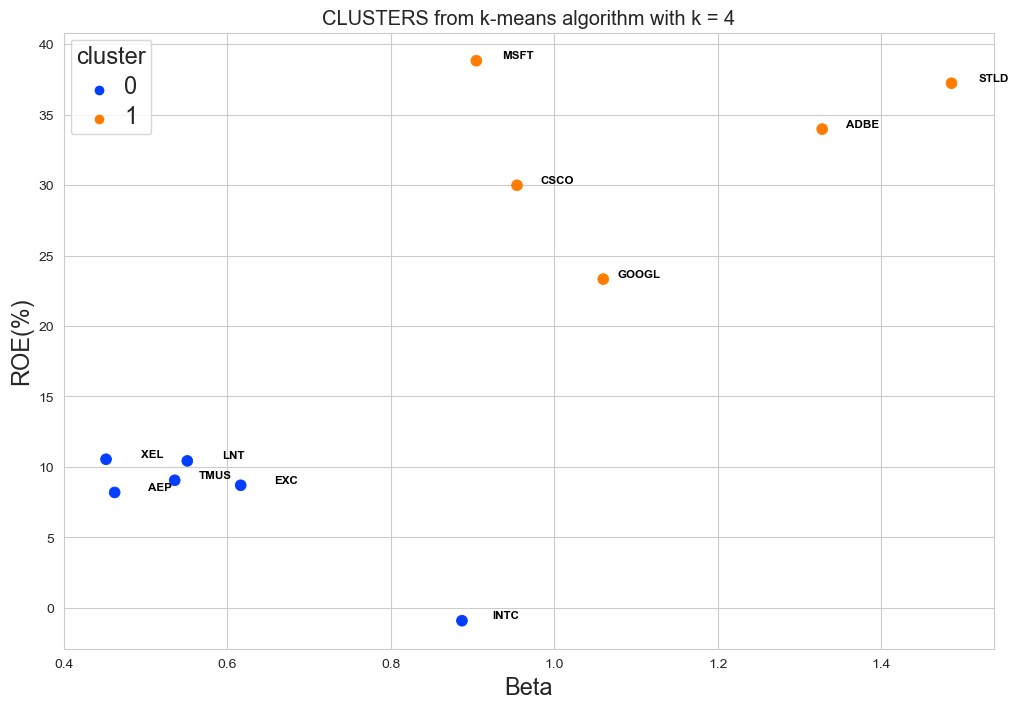

In [43]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(12, 8))

sns.set_style('whitegrid')
ax = sns.scatterplot(y="ROE%", x="Beta", edgecolor='face', hue="cluster",data=df, palette = 'bright',s=60)

plt.xlabel('Beta', size=17)
plt.ylabel('ROE(%)', size=17)
plt.setp(ax.get_legend().get_texts(), fontsize='17') # for text in legend
plt.setp(ax.get_legend().get_title(), fontsize='17') # for title in legend
plt.title('CLUSTERS from k-means algorithm with k = 4',fontsize='x-large')

for i in range(0,df.shape[0]):
     plt.text(df.Beta[i]+0.07, df['ROE%'][i]+0.01, df.index[i],horizontalalignment='right',verticalalignment='bottom', size='small', color='black', weight='semibold')

This scatter plot displays data points representing different companies based on two financial metrics: Return on Equity (ROE) and Beta. Here's an interpretation based on the presented plot:

1. **Axes Interpretation**:
   - **X-axis (Beta)**: Beta measures the volatility of a stock relative to the overall market. A Beta > 1 indicates that the stock is more volatile than the market, while a Beta < 1 means it's less volatile. Beta of 1 suggests the stock's price moves with the market.
   - **Y-axis (ROE - Return on Equity)**: ROE measures a company's profitability by comparing its net income to shareholders' equity. It indicates how well the company uses shareholders' equity to generate earnings.

2. **Clusters**:
   - The plot has two distinct clusters, labeled as "0" (in blue) and "1" (in orange). This suggests some form of clustering or classification has been applied, possibly to segment companies based on their financial characteristics.
   
3. **Observations**:
   - **High ROE, High Beta (Top Right Quadrant)**: Companies like STLD and ADBE have both high ROE and high Beta, indicating they are potentially high-reward but also high-risk investments.
   - **High ROE, Low Beta (Top Left Quadrant)**: There are no companies in this quadrant. Companies here would represent good profitability with lower volatility, an ideal scenario for many investors.
   - **Low ROE, High Beta (Bottom Right Quadrant)**: Companies like INTC fall into this category, suggesting they might be riskier investments without the high profitability to potentially justify the risk.
   - **Low ROE, Low Beta (Bottom Left Quadrant)**: Many companies, such as XEL, LNT, and AEP, are in this quadrant, indicating they are potentially stable (less volatile) but have lower profitability.

4. **Individual Companies**:
   - **MSFT (Microsoft)**: Has a relatively high ROE and moderate Beta, suggesting it's a profitable company with moderate risk.
   - **GOOGL (Alphabet/Google)**: Has a high ROE but is also positioned towards a higher Beta, indicating higher volatility.
   - **INTC (Intel)**: Is an outlier with the lowest ROE and the lowest Beta. This could suggest that it's a stable company but with currently lower profitability relative to its equity.

5. **General Trend**: There's no clear linear trend between Beta and ROE based on this plot, suggesting that there isn't a straightforward relationship between these two metrics for the presented companies.

In conclusion, this plot provides a visual comparison of companies based on their profitability and market risk. An investor or analyst can use this to identify companies that align with their risk tolerance and return expectations.


<b>The next question that arises is how to decide the value of hyperparameter K before fitting the model?</b>

We passed the value of hyperparameter K = 2 on a random basis while fitting the model. One of the ways of doing this is to check the model's 'inertia', which represents the distance of points in a cluster from its centroid.

As more and more clusters are added, the inertia keeps on decreasing, creating what is called an <b>elbow curve.</b> We select the value of k beyond which we do not see much benefit (i.e., decrement) in the value of inertia.

Below we plot the inertia values for K-mean models with different values of 'K':

C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


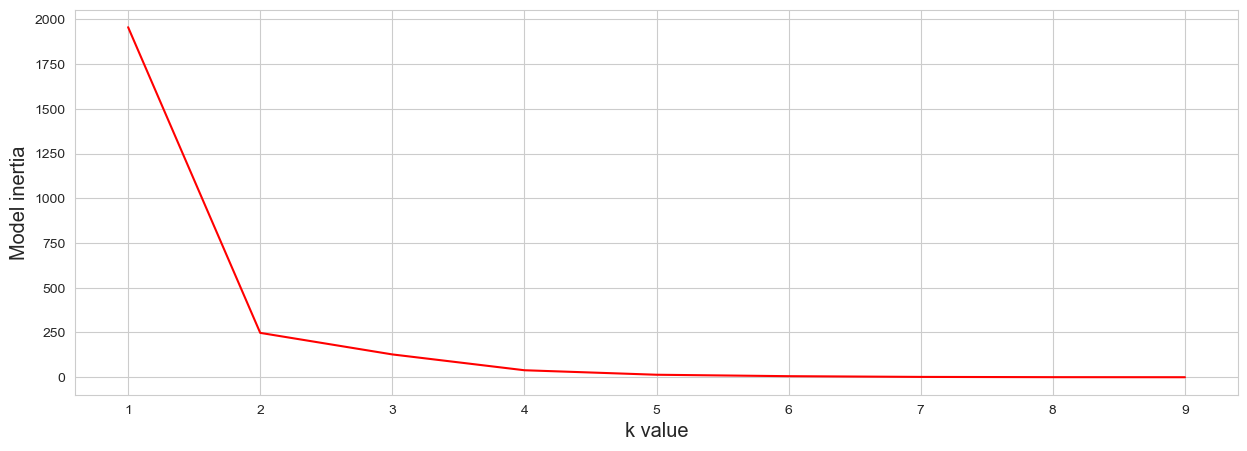

In [44]:
# calculating inertia for k-means models with different values of 'k'
inertia = []
k_range = range(1,10)
for k in k_range:
    model = KMeans(n_clusters=k)
    model.fit(df)
    inertia.append(model.inertia_)

# plotting the 'elbow curve'
plt.figure(figsize=(15,5))
plt.xlabel('k value',fontsize='x-large')
plt.ylabel('Model inertia',fontsize='x-large')
plt.plot(k_range,inertia,color='r')
plt.show()

As we can see that the inertia value shows marginal decrement after k= 3, a k-means model with k=3(three clusters) is the most suitable for this task.

## Dimensionality reduction

### Concept of dimensionality reduction


The phenomenon known as the curse of dimensionality refers to the adverse consequences of including an excessive number of features in machine learning models, resulting in superfluous augmentation of storage capacity and computational time requirements. Therefore, our primary objective is to provide a valuable data representation in a reduced dimensionality while minimizing the loss of information.

Dimensionality reduction methods are often used to accomplish this task, representing another prevalent application of unsupervised learning.

The use of dimensionality reduction techniques yields improved performance in terms of computational speed and memory utilization, but at the expense of sacrificing a certain amount of information. It is important to ensure that the advantages of losing such information surpass the associated costs.

### Principal Component Analysis

One method often used to decrease the dimensionality of data involves the projection of data points onto a lower-dimensional subspace. This process is visually shown in the accompanying picture, where points originating from a three-dimensional space (characterized by three characteristics, namely x1, x2, and x3) are projected onto a two-dimensional subspace (consisting only of x1 and x2):

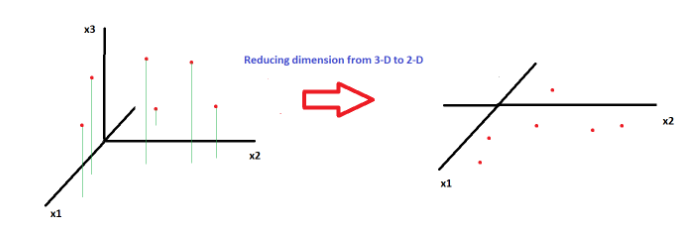

Principal Component Analysis (PCA) employs a similar methodology; however, with PCA, novel coordinates are determined to elucidate the greatest amount of variance present in the data. This is accomplished by:

The first step involves mean centering the data, which entails adjusting each column's mean to zero. Subsequently, the eigendecomposition of the covariance matrix (C) of the mean-centered variables is computed. The eigendecomposition of a square matrix, which is applicable to covariance matrices since they are always square matrices, may be expressed as follows:

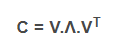

Here 'V' represents the matrix containing the eigenvectors (of covariance matrix C), which represent our new coordinates or principal components, and Λ is a diagonal matrix containing the eigenvalues of C.

Each diagonal value in Λ is an eigenvalue that represents the variance explained by the corresponding principal component. This procedure ensures that resulting new coordinates/features/principal components are designed to capture maximum variation in the data and are orthogonal (perpendicular) to each other (i.e., our new features are uncorrelated with each other).


The subsequent stage involves the selection of a limited number of primary components, prioritizing those that sequentially account for the highest amount of variance, using a predetermined threshold.

For instance, in the scenario where there are initially five features, the resulting main components will also amount to five. However, a decision is made to retain just the top three components, since they account for 90% of the variability seen in the dataset. This implies that the dimensionality of our feature space has been efficiently decreased from 5 to 3 while retaining a significant amount of information.

### Example of PCA in trading or investing with code in Python

Suppose we are looking to develop a supervised ML model that predicts the direction of the overall market and decide to use the past day returns of a basket of 7 tech stocks (assume they are the same stocks that were part of cluster 0 in the previous example) as features for the model.

To be more efficient with resources, we want to reduce the dimensions of the feature space before we feed the features to the supervised model.

So, to quickly explore the possibility of reducing dimensions of data at hand?
Yes, you are right, it's PCA!

Below we showcase how we can go about conducting PCA using the scikit learn package in Python.



#### Getting the list of tech stocks

In [46]:
stock_list1 =  list(df[df['cluster']==0].index)
stock_list1

['AEP', 'EXC', 'INTC', 'LNT', 'TMUS', 'XEL']

In [72]:
# Define the ticker list
tickers_list = ['AEP', 'EXC', 'INTC', 'LNT', 'TMUS', 'XEL']

# Download the data for the above tickers
df1 = yf.download(tickers_list, "2018-01-01", end="2023-03-01")

# Set the index to a datetime object
df1.index = pd.to_datetime(df1.index)

# Display the first 5 rows
df1.head()

[*********************100%%**********************]  6 of 6 completed


Adj Close                                                         \
                  AEP        EXC       INTC        LNT       TMUS        XEL   
Date                                                                           
2018-01-02  59.396881  23.280428  39.988182  35.377621  64.040001  40.473221   
2018-01-03  58.896492  22.968775  38.631062  35.066776  63.610001  40.202328   
2018-01-04  58.199253  22.645351  37.922638  34.655117  63.000000  39.889107   
2018-01-05  58.076206  22.457180  38.187233  34.512291  64.599998  39.609745   
2018-01-08  58.584789  22.698275  38.187233  34.898746  65.099998  39.906040   

                Close                                   ...       Open  \
                  AEP        EXC       INTC        LNT  ...       INTC   
Date                                                    ...              
2018-01-02  72.410004  28.238232  46.849998  42.110001  ...  46.380001   
2018-01-03  71.800003  27.860201  45.259998  41.740002  ...  45.470001   
2018-01-04  70.949997  27.467903  44.430000  41.250000  ...  43.520000   
2018-01-05  70.800003  27.239658  44.740002  41.080002  ...  44.430000   
2018-01-08  71.419998  27.532097  44.740002  41.540001  ...  44.270000   

                                              Volume                       \
                  LNT       TMUS        XEL      AEP       EXC       INTC   
Date                                                                        
2018-01-02  42.619999  63.900002  48.220001  3016800   7224506   23370800   
2018-01-03  42.029999  63.889999  47.570000  2235700   6750350  116479000   
2018-01-04  41.639999  63.889999  47.299999  3392100   6630619   89209100   
2018-01-05  41.380001  63.540001  47.180000  2967900  10013224   41824000   
2018-01-08  41.080002  64.459999  46.880001  5715500  15116925   33733800   

                                       
                LNT     TMUS      XEL  
Date                                   
2018-01-02  1392900  2192400  2443400  
2018-01-03  1481800  2610800  4114900  
2018-01-04  1352500  2384400  2807000  
2018-01-05  1665000  3292600  3728000  
2018-01-08  1718900  3606000  3837600  

[5 rows x 36 columns]

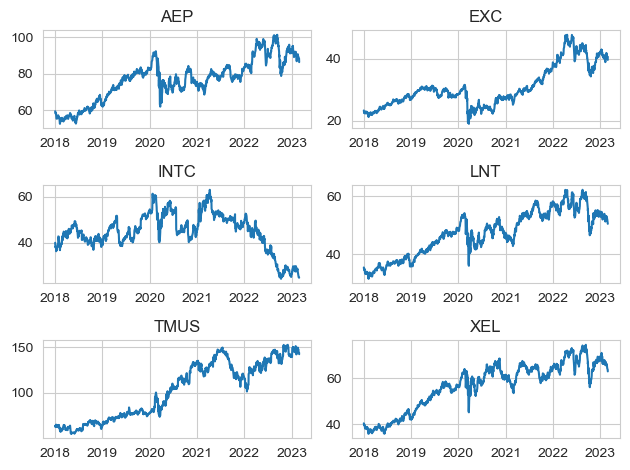

In [73]:
fig = plt.figure()
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)
ax1.plot(df1['Adj Close']['AEP'])
ax1.set_title("AEP")
ax2.plot(df1['Adj Close']['EXC'])
ax2.set_title("EXC")
ax3.plot(df1['Adj Close']['INTC'])
ax3.set_title("INTC")
ax4.plot(df1['Adj Close']['LNT'])
ax4.set_title("LNT")
ax5.plot(df1['Adj Close']['TMUS'])
ax5.set_title("TMUS")
ax6.plot(df1['Adj Close']['XEL'])
ax6.set_title("XEL")
plt.tight_layout()
plt.show()

In [74]:
multpl_stock_daily_returns = df1['Adj Close'].pct_change()
multpl_stock_monthly_returns = df1['Adj Close'].resample('M').ffill().pct_change()

Let's break down the code step by step:

1. **multpl_stock_daily_returns = df1['Adj Close'].pct_change()**

    - `df1['Adj Close']`: This accesses the column named 'Adj Close' from the dataframe `df1`. The 'Adj Close' column typically represents the adjusted closing price of stocks, which accounts for events like stock splits, dividends, etc.

    - `.pct_change()`: This method calculates the percentage change between the current and the previous row. In the context of stock prices, it computes the daily return or daily percentage change in the stock price.

    The result is stored in the variable `multpl_stock_daily_returns`, which will now hold the daily returns for the 'Adj Close' prices.

2. **multpl_stock_monthly_returns = df1['Adj Close'].resample('M').ffill().pct_change()**

    - `df1['Adj Close']`: Again, this accesses the 'Adj Close' column from the dataframe `df1`.

    - `.resample('M')`: This method is used to resample time-series data. Here, it's being used to resample the data to a monthly frequency. The `'M'` stands for 'Month end frequency'. So, it will aggregate data to the end of the month.

    - `.ffill()`: This method is called "forward fill". After resampling, if there are any missing values (for example, if some days in the month have no data), this method will fill those missing values with the last known (previous) value. This ensures that there are no NaN or missing values in our resampled data.

    - `.pct_change()`: Just like before, this computes the percentage change. Since the data is now resampled to a monthly frequency, this will compute the monthly returns or the monthly percentage change in the 'Adj Close' price.

    The result is stored in the variable `multpl_stock_monthly_returns`, which will now hold the monthly returns for the 'Adj Close' prices.

In summary, the code computes the daily and monthly returns for the adjusted closing prices of stocks from the dataframe `df1`.

<Figure size 640x480 with 0 Axes>

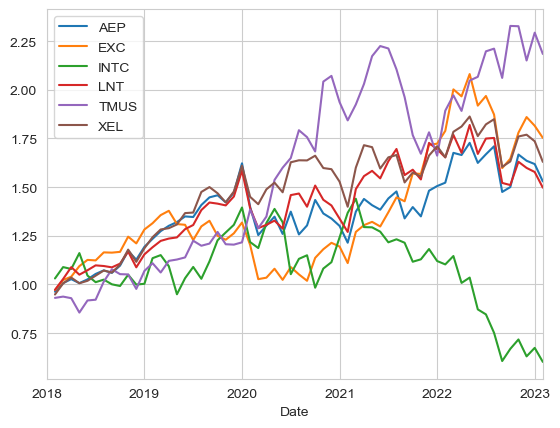

In [75]:
fig = plt.figure()
(multpl_stock_monthly_returns + 1).cumprod().plot()
plt.show()

### Plot Interpretation:
The plot visualizes the cumulative returns of several stocks from 2018 to 2023. Here are some observations and interpretations based on the plot:

- **Y-axis**: Represents the cumulative return, with a starting value of 1.0. A value of 1.5 would mean that the stock has grown by 50% since the beginning of the time frame.
  
- **X-axis**: Represents the timeline from 2018 to 2023.
  
- Each colored line corresponds to a different stock, as labeled in the legend.
  
- **Performance Trends**:
  - The stock represented by the green line (INTC) has seen a significant decline from 2021 onwards.
  - The stock represented by the blue line (AEP) appears to be the most volatile, with several sharp increases and decreases.
  - Some stocks like the one represented by the red line (LNT) and the purple line (TMUS) have shown a general upward trend, suggesting they've been growing over this period.
  
- All stocks seem to have experienced some volatility around 2020, which might be attributed to global events or market conditions during that time.

In essence, this plot provides a visual representation of how different stocks have performed over the given timeframe, allowing for easy comparison and trend analysis.

### PCA
The first stage of Principal Component Analysis (PCA) is the process of mean-centring the data. In this study, the PCA class from the scikit-learn library will be utilized. This class incorporates automatic data scaling, specifically mean centering. Consequently, manual scaling is unnecessary. It is important to note that if an alternative package is employed, manual scaling may be required through matrix operations or the utilization of sklearn.preprocessing. 

We will simply convert the data into a NumPy array format as required by the scikit learn library, import the PCA class and create an instance called 'model' to which we fit the raw data X:

In [76]:
# Raw data converted to NumPy array
X = df1.values

# Importing and initializing the PCA class from scikit learn and then fitting the data to the model.
from sklearn.decomposition import PCA
model = PCA(n_components=6).fit(X)
model

PCA(n_components=6)

The hyperparameter of the model 'n_components' represents the dimension of the new co-ordinate/principal component space.

To begin with, we have initialized the model with the value of hyperparameter 'n_components' set to 6, which is the same as the number of original features in X(as we have 6 stocks).

We can access the principal component matrix/eigenvector matrix using the following command:

In [77]:
# PC matrix
model.components_

array([[ 9.78861588e-08,  8.11098101e-08, -1.49591497e-07,
         6.92190308e-08,  4.55573012e-07,  1.11000696e-07,
         3.57658280e-08,  5.73605496e-08, -1.89832615e-07,
         3.79532715e-08,  4.55573012e-07,  7.84268340e-08,
         4.83016559e-08,  6.26512356e-08, -1.76557447e-07,
         4.44073797e-08,  4.69258045e-07,  8.73248805e-08,
         2.68585704e-08,  5.45095115e-08, -1.97483497e-07,
         3.33225364e-08,  4.43740802e-07,  7.23481662e-08,
         3.91475596e-08,  5.90875767e-08, -1.84703835e-07,
         3.93810551e-08,  4.58632270e-07,  7.96814771e-08,
         3.40236980e-02,  3.54125020e-02,  9.98104976e-01,
         9.94740263e-03,  3.09211195e-02,  1.78811030e-02],
       [-6.55094311e-08, -1.14062720e-07,  1.72717238e-07,
        -4.21220352e-08, -1.68026784e-07, -1.16500181e-09,
        -7.37841086e-08, -1.28114525e-07,  1.83416270e-07,
        -4.98477768e-08, -1.68026784e-07, -2.62032400e-09,
        -3.76681699e-08, -1.13239031e-07,  1.97396870e-

The principal components above have automatically been arranged in the order of the variance they explain(from high to low). So now, we can actually extract and plot the percentage of variance captured by each principal component as follows:

In [83]:
# Percentage of variation explained by successive eigenvectors/PCS
model.explained_variance_ratio_.round(2)

array([0.9 , 0.05, 0.04, 0.01, 0.  , 0.  ])

<BarContainer object of 6 artists>

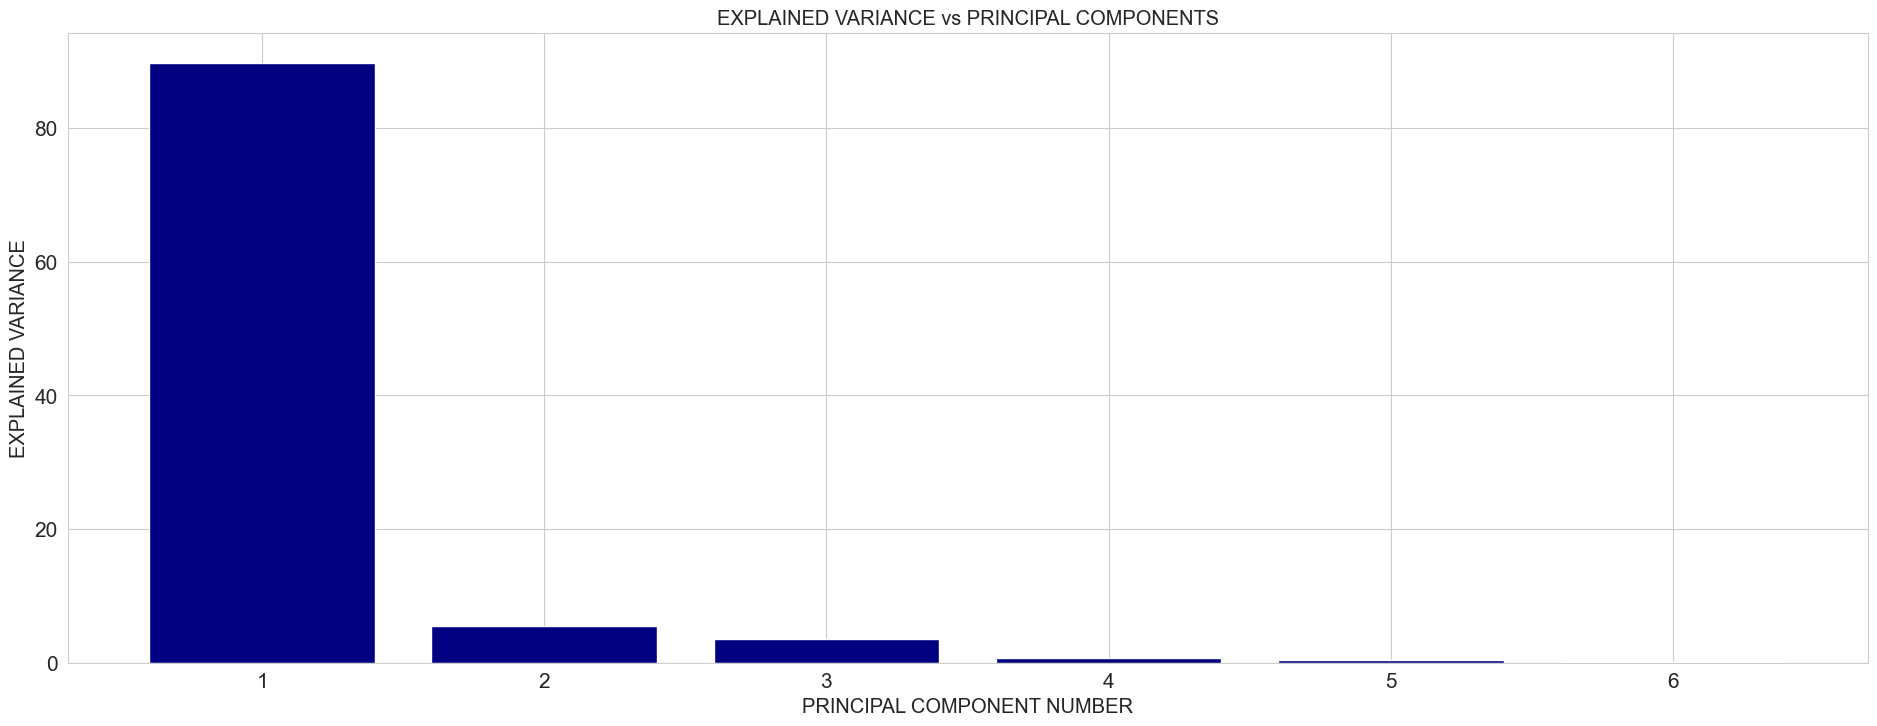

In [79]:
import numpy as np
# Plotting the  Percentage of variation explained vs PCs
#x_index = np.arange(1, X.shape[1]+1)
x_index = np.arange(1, len(model.explained_variance_ratio_)+1)

fig = plt.figure(figsize=(20,7))

axes = fig.add_axes([0.1,0.1,0.9,0.9])
axes.tick_params(axis='x', labelsize= 15 )
axes.tick_params(axis='y', labelsize= 15 )
axes.set_title('EXPLAINED VARIANCE vs PRINCIPAL COMPONENTS',fontsize='x-large')
axes.set_ylabel('EXPLAINED VARIANCE' ,fontsize='x-large')
axes.set_xlabel('PRINCIPAL COMPONENT NUMBER',fontsize='x-large')
axes.bar(x_index,model.explained_variance_ratio_*100,color='navy')

The given plot illustrates the percentage of variance explained by each of the principal components derived from some data during Principal Component Analysis (PCA).

**Interpretation of the plot:**

1. **Principal Components (PCs):** On the x-axis, you have the principal component number. Each bar corresponds to a principal component, starting from the first to the sixth in this case.

2. **Explained Variance:** The y-axis represents the percentage of the total variance in the data that is explained by each principal component. The height of each bar indicates how much of the total variance is captured by that principal component.

3. From the plot, it is evident that:
    - The first principal component explains a significant portion (roughly around 80%) of the total variance in the data.
    - The second principal component explains a much smaller portion of the variance.
    - The subsequent principal components (from third onwards) explain an even smaller amount of variance, with their contributions being almost negligible.

4. In many PCA applications, one often selects a subset of principal components that collectively explain a significant portion of the total variance (often over 90% or 95%). Given the drop in variance explained after the first component, one might consider using only the first one or two components for further analysis or modeling.

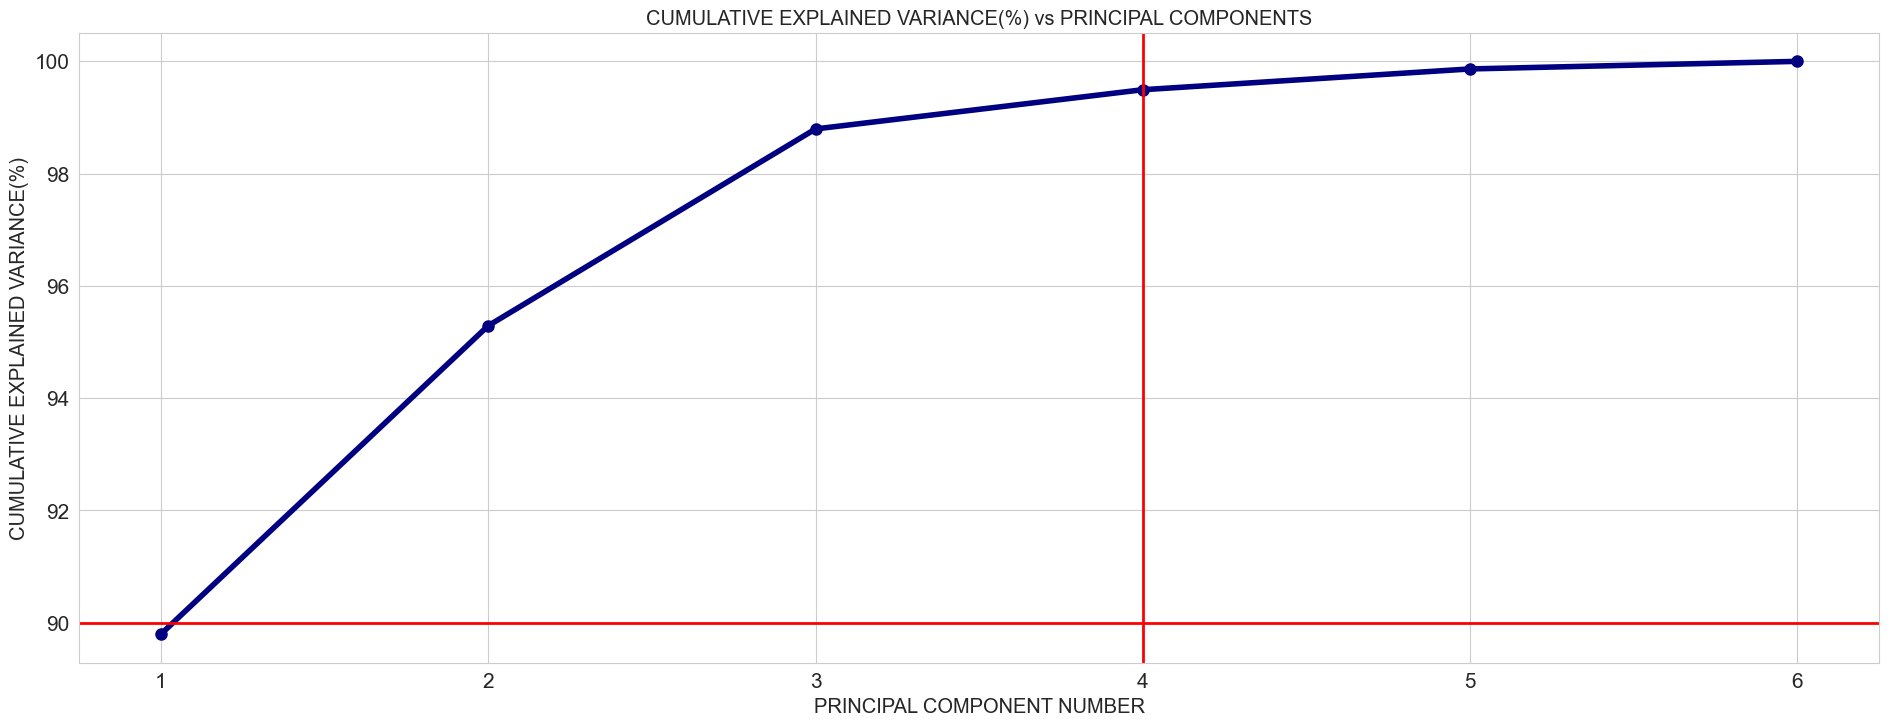

In [80]:
fig = plt.figure(figsize=(20,7))

x_index = np.arange(1, len(model.explained_variance_ratio_)+1)

axes = fig.add_axes([0.1,0.1,0.9,0.9])
axes.tick_params(axis='x', labelsize= 15 )
axes.tick_params(axis='y', labelsize= 15 )
axes.set_title('CUMULATIVE EXPLAINED VARIANCE(%) vs PRINCIPAL COMPONENTS',fontsize='x-large')
axes.set_ylabel('CUMULATIVE EXPLAINED VARIANCE(%)',fontsize='x-large')
axes.set_xlabel('PRINCIPAL COMPONENT NUMBER',fontsize='x-large')
axes.plot(x_index,np.cumsum(model.explained_variance_ratio_)*100,color='navy',lw =4, ls='-', marker='o', markersize='8')
plt.axhline(90,color='r',lw = 2)
plt.axvline(4,color='r',lw = 2)
plt.show();

The provided plot illustrates the cumulative explained variance by the principal components derived from some data during Principal Component Analysis (PCA).

**Interpretation of the plot:**

1. **Principal Components (PCs):** On the x-axis, you have the principal component number. The points on the line graph represent cumulative variance up to that particular principal component.

2. **Cumulative Explained Variance:** The y-axis denotes the percentage of the total cumulative variance in the data that is explained up to each principal component.

3. From the plot:
    - The steep slope between the first and second components suggests that these two principal components capture a significant portion of the variance in the data.
    - The slope begins to flatten out after the fourth component, indicating that subsequent components add little additional explained variance.
    - There are two reference lines drawn in red: a horizontal one at 90% and a vertical one at the fourth principal component. These lines suggest that around 90% of the total variance is explained by the first four principal components.

4. The intersection of the red lines indicates a potential threshold for dimensionality reduction. In this case, one might consider retaining only the first four principal components for further analysis or modeling.


Below, we fit a new PCA model with 'n_components' = 4 and call it 'model_2':

In [84]:
model_2 = PCA(n_components=4).fit(X)

We can now access the principal components and the percentage of variation explained by successive principal components:

In [85]:
model_2.components_

array([[ 9.78861588e-08,  8.11098101e-08, -1.49591497e-07,
         6.92190308e-08,  4.55573012e-07,  1.11000696e-07,
         3.57658280e-08,  5.73605496e-08, -1.89832615e-07,
         3.79532715e-08,  4.55573012e-07,  7.84268340e-08,
         4.83016559e-08,  6.26512356e-08, -1.76557447e-07,
         4.44073797e-08,  4.69258045e-07,  8.73248805e-08,
         2.68585704e-08,  5.45095115e-08, -1.97483497e-07,
         3.33225364e-08,  4.43740802e-07,  7.23481662e-08,
         3.91475596e-08,  5.90875767e-08, -1.84703835e-07,
         3.93810551e-08,  4.58632270e-07,  7.96814771e-08,
         3.40236980e-02,  3.54125020e-02,  9.98104976e-01,
         9.94740263e-03,  3.09211195e-02,  1.78811030e-02],
       [-6.55094311e-08, -1.14062720e-07,  1.72717238e-07,
        -4.21220352e-08, -1.68026784e-07, -1.16500181e-09,
        -7.37841086e-08, -1.28114525e-07,  1.83416270e-07,
        -4.98477768e-08, -1.68026784e-07, -2.62032400e-09,
        -3.76681699e-08, -1.13239031e-07,  1.97396870e-

In [88]:
model_2.explained_variance_ratio_

array([0.89797459, 0.05493268, 0.03505332, 0.00698682])

In [89]:
# New reduced dimension data
Z = model_2.transform(X)
Z

array([[ -7277455.23347369,  -2146112.42863403,   -391642.54358368,
          -227197.66190257],
       [ 85654645.48226227,  -6283828.80708023,   2334582.80958383,
         -1131411.48601751],
       [ 58439854.20199352,  -5276098.46982325,   1749164.22355474,
         -1136367.20818574],
       ...,
       [ 13499329.08181013,   -767570.43898278,    780234.79161346,
          -818077.7553975 ],
       [  7019987.89765086,   -788173.06717864,   2882887.54711965,
          -248540.95144936],
       [ 20271428.14866584,   6457763.18336295, -12019378.04023433,
         -2977914.55339655]])

In [90]:
# Shape of original data
X.shape

(1298, 36)

In [91]:
# Shape of reduced dimension data post PCA
Z.shape

(1298, 4)

Looking at the shapes of original data and the new reduced dimension data we can see how unsupervised learning algorithms like PCA can help us be more efficient with resources and to create new features to build parsimonious supervised models.

